import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
# Clinical Deterioration Prediction Model: Inferential Statistics

`This notebook includes a Statistical Data Analysis based on the final dataset prepared for a Clinical Deterioration (cd) Prediction Model.`

`To learn more about the data source, descriptive statistics and additional exploratory data analysis please visit https://github.com/abebual/Exploratory-Data-Analysis-Clinical-Deterioration`

`Abebual Demilew | github.com/abebual | @evidence2policy`
____

In [2]:
import os
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt


In [3]:
os.getcwd()

'C:\\Users\\abebu\\Dropbox\\Data Science\\Projects\\Capstone Project 1\\Potential Projects\\9. MIMIC\\Statistical_Data_Analysis\\Clinical-Deterioration-Prediction-Model--Inferential-Statistics'

In [5]:
os.chdir("C://Users/abebu/Google Drive/mimic-iii-clinical-database-1.4")
saps = pd.read_csv("saps_ts.csv", header=0, index_col=0)
saps.head()

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,los,hdeath,death,admission,ud,bun,Bicarbonate,...,WBC_3.0,hr_0.0,hr_2.0,hr_4.0,hr_7.0,hr_11.0,bp_0.0,bp_2.0,bp_5.0,bp_13.0
0,268,110404,280836,3.2490,1,1,8,0.0,6.0,0.0,...,0,0,0,0,0,1,0,0,0,1
1,269,106296,206613,3.2788,0,0,8,17.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
2,270,188028,220345,2.8939,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
3,271,173727,249196,2.0600,0,0,8,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
4,272,164716,210407,1.6202,0,0,8,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0


In [6]:
saps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61117 entries, 0 to 61116
Data columns (total 33 columns):
SUBJECT_ID       61117 non-null int64
HADM_ID          61117 non-null int64
ICUSTAY_ID       61117 non-null int64
los              61117 non-null float64
hdeath           61117 non-null int64
death            61117 non-null int64
admission        61117 non-null int64
ud               61117 non-null float64
bun              61117 non-null float64
Bicarbonate      61117 non-null float64
ventilation      61117 non-null float64
Temp             61117 non-null float64
Bilirubin        61117 non-null float64
gcs              61117 non-null float64
AGE              61117 non-null float64
UO               61117 non-null float64
saps2            61117 non-null float64
Potassium_0.0    61117 non-null int64
Potassium_3.0    61117 non-null int64
Sodium_0.0       61117 non-null int64
Sodium_1.0       61117 non-null int64
Sodium_5.0       61117 non-null int64
WBC_0.0          61117 non-null i

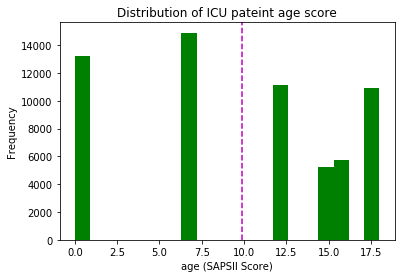

In [7]:
#Inferential Statistics - Frequentism
#1.AGE Score
mean_age=np.mean(saps.AGE)
std_age=np.std(saps.AGE)

_ = plt.hist(saps.AGE, bins=20, color='g')
_ = plt.xlabel('age (SAPSII Score)')
_ = plt.ylabel('Frequency')
_ = plt.title('Distribution of ICU pateint age score')
_ = plt.axvline(mean_age, color='m', linestyle='--')

In [8]:
#saps['saps2']= saps.iloc[:, -15:].sum(axis=1)

[Text(0.5, 1, 'Correlations: ICU Patients SAPSII Score')]

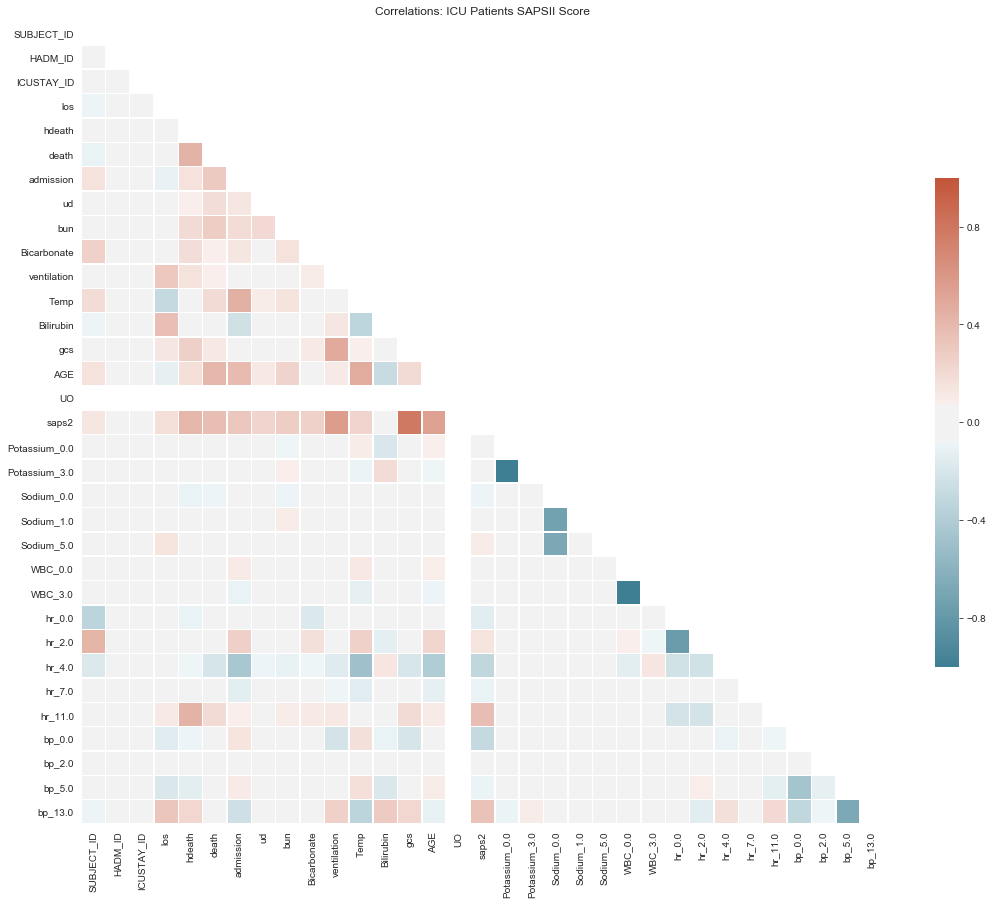

In [9]:
import seaborn as sns
# Compute correlations
corr = saps.corr()

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Add diverging colormap
#cmap =sns.diverging_palette(150, 275, s=80, l=55, n=12)
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
ax.set (title='Correlations: ICU Patients SAPSII Score')

## Inferential Statistics - Frequentist

In [10]:
survived=saps.AGE.loc[saps.hdeath==0]
deceased=saps.AGE.loc[saps.hdeath==1]

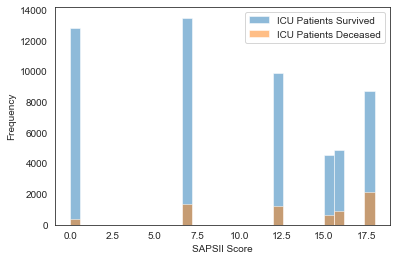

In [11]:
_ = plt.hist(survived, bins=30, alpha=0.5, label='ICU Patients Survived')
_ = plt.hist(deceased, bins=30, alpha=0.5, label='ICU Patients Deceased')
_ = plt.xlabel('SAPSII Score')
_ = plt.ylabel('Frequency')
_ = plt.legend()

In [16]:
# perform hypothesis test of spas2 score between those passed away at hospital and survived

from scipy.stats import ttest_ind
survived=saps.saps2.loc[saps.hdeath==0]
deceased=saps.saps2.loc[saps.hdeath==1]
ttest_ind(survived, deceased)


Ttest_indResult(statistic=-113.38421526216234, pvalue=0.0)

In [13]:
list(saps.columns)

['SUBJECT_ID',
 'HADM_ID',
 'ICUSTAY_ID',
 'los',
 'hdeath',
 'death',
 'admission',
 'ud',
 'bun',
 'Bicarbonate',
 'ventilation',
 'Temp',
 'Bilirubin',
 'gcs',
 'AGE',
 'UO',
 'saps2',
 'Potassium_0.0',
 'Potassium_3.0',
 'Sodium_0.0',
 'Sodium_1.0',
 'Sodium_5.0',
 'WBC_0.0',
 'WBC_3.0',
 'hr_0.0',
 'hr_2.0',
 'hr_4.0',
 'hr_7.0',
 'hr_11.0',
 'bp_0.0',
 'bp_2.0',
 'bp_5.0',
 'bp_13.0']

In [57]:
ttest_name_list = ['admission', 'ud', 'bun', 'Bicarbonate', 'ventilation', 'Temp', 'Bilirubin', 'gcs', 'AGE', 'UO',
                'saps2', 'Potassium_0.0', 'Potassium_3.0', 'Sodium_0.0', 'Sodium_1.0', 'Sodium_5.0', 'WBC_0.0',
                'WBC_3.0', 'hr_0.0', 'hr_2.0', 'hr_4.0', 'hr_7.0', 'hr_11.0', 'bp_0.0', 'bp_2.0', 'bp_5.0', 'bp_13.0']
for i in (ttest_name_list):
    stat, pvalue=ttest_ind(saps[i], saps['hdeath'])       
    print(i, stat, pvalue)

admission 422.0928311045037 0.0
ud 79.48553209547315 0.0
bun 103.82321908155082 0.0
Bicarbonate 50.20290726333376 0.0
ventilation 269.5616326641353 0.0
Temp 428.78581356046413 0.0
Bilirubin 68.31563939515497 0.0
gcs 185.50528236030465 0.0
AGE 374.9833756789964 0.0
UO -86.57830736617781 0.0
saps2 528.4388303796287 0.0
Potassium_0.0 613.9450781425617 0.0
Potassium_3.0 -59.82832139042311 0.0
Sodium_0.0 575.893954295901 0.0
Sodium_1.0 -64.01776903987019 0.0
Sodium_5.0 -66.93879118526705 0.0
WBC_0.0 572.7364948958383 0.0
WBC_3.0 -47.051164834922716 0.0
hr_0.0 137.92767245017222 0.0
hr_2.0 136.97522688863378 0.0
hr_4.0 -27.759615489236438 4.484733069363873e-169
hr_7.0 -79.36376090302323 0.0
hr_11.0 -31.431895017712954 5.427222076346614e-216
bp_0.0 33.35969234249016 6.566038544175584e-243
bp_2.0 -70.68488389053853 0.0
bp_5.0 162.14385989281462 0.0
bp_13.0 90.75917162078173 0.0


`Indipendent ttest result shows:`
* There is a statistically significant diffrence in admission type between deceased and survived ICU patients `(tstat=422, pvalue=0.0)`. On average we have higher number of unscheduled surgical admissions among deceased ICU patients. 
* There is a statistically significant diffrence in the diagnosis of chronic disease between deceased and survived ICU patients `(tstat=79.5, pvalue=0.0)`. On average we have higher number of ICU patients with chronic dieases such as metastatic cancer,hematologic malignancy, and AIDS when compared between decieased and survived ICU stay. 
* There is a statistically significant diffrence in blood urea nitrogin levels  between deceased and survived ICU patients `(tstat=103.8, pvalue=0.0)`. On average we have higher number of ICU patients with high levels of blood urea nitrogen among deceased ICU patients. 
* There is a statistically significant diffrence in blood bicarbonate levels  between deceased and survived ICU patients `(tstat=50, pvalue=0.0)`. On average we have higher number of ICU patients with low levels of blood bicarbonate levels among deceased ICU patients. 
* There is a statistically significant diffrence in ventilation use between deceased and survived ICU patients `(tstat=269.6, pvalue=0.0)`. On average we have higher number of ICU patients on ventilation among deceased ICU patients. 
* There is a statistically significant diffrence in level of body temprature between deceased and survived ICU patients `(tstat=428.8, pvalue=0.0)`. On average we have patients with high body temprature among deceased ICU patients. 
* There is a statistically significant diffrence in Bilirubin level between deceased and survived ICU patients `(tstat=68.3, pvalue=0.0)`. On average we have higher number of patients with high Bilirubin levels among deceased ICU patients. 
* There is a statistically significant diffrence total Glasgow Coma Score between deceased and survived ICU patients `(tstat=185.5, pvalue=0.0)`. On average we have higher number of ICU patients with higher Glsgow Coma Score among deceased ICU patients. The total Glasgow Coma Score is based on best eye response, best verbal response, and best motor response scores. 
* There is a statistically significant diffrence in patient age between deceased and survived ICU patients `(tstat=375, pvalue=0.0)`. On average we have higher proportion of deceased ICU patients who are older.  
* There is a statistically significant diffrence in urine output between deceased and survived ICU patients `(tstat=-86.6, pvalue=0.0)`. On average ICU patients who are deceased have lower level of urine output compared to survived ICU patients. 

* There is a statistically significant diffrence in blood potassium level between deceased and survived ICU patients `(tstat=-59.8, pvalue=0.0)`. On average we have higher number of ICU patients with low levels of blood potassium among deceased ICU patients. 
* There is a statistically significant diffrence in blood sodium levels (sodium sapsii score=1 and 5) between deceased and survived ICU patients `(tstat=-64,-67, pvalue=0.0, 0.0)`. On average we have higher number of patients with low level of blood sodium among deceased ICU patients. 
* There is a statistically significant diffrence in white blood cell counts between deceased and survived ICU patients `(tstat=-47, pvalue=0.0)`. On average we have higher proportion of ICU patients with above normal white blood cell counts among deceased ICU patients. 
* There is no statistical diffrence in the proportion of patients with cardiac arrest (`hr_11.0`), however we observed statistically significant diffrence in the proportion of patients with extreme tachycardia (`hr_7.0, -79.4, 0.0`), and heart rate below normal (`hr_2.0, 137, 0.0). 

* There is a statistically significant diffrence in the patient systolic blood pressure between deceased and survived ICU patients. On average we have higher number of ICU patients with systeolic blood pressure less than 70mmHg `(tstat=90.8, pvalue=0.0)`, below normal (between 70 -99mmHg), `(tstat=162, pvalue=0.0)`, above normal (more than and equal to 200mmHg) `(tstat=-70.7, pvalue=0.0)`among deceased ICU patients.




## Inferential Statistics - Bootstrapping

In [19]:
np.random.seed(47)
N_rep = 10000
bs_means=np.empty(N_rep)

for i in range (N_rep):
    bs_sample = np.random.choice(saps.saps2, size=len(saps.saps2))
    bs_means[i] = np.mean(bs_sample)

bs_mean, bs_std=np.mean(bs_means), np.std(bs_means)
lower_limit=bs_mean-(1.64*bs_std)
lower_limit

42.88408855744203

In [20]:

survived=saps.saps2.loc[saps.death==0]
deceased=saps.saps2.loc[saps.death==1]

np.random.seed(47)
bs_std_diff=np.empty(N_rep)

for i in range (N_rep):
    bs_survived = np.random.choice(survived, size=len(survived))
    bs_deceased = np.random.choice(deceased, size=len(deceased))
    bs_std_diff[i]=np.std(bs_deceased) - np.std(bs_survived)
    
bs_std_diff_mean, bs_std_diff_std=np.mean(bs_std_diff), np.std(bs_std_diff)
ci_std_diff=[bs_std_diff_mean - 1.96*bs_std_diff_std, bs_std_diff_mean + 1.96*bs_std_diff_std]

print('The 95% confidence interval for the difference between the standard deviations\
 of survived and deceased SAPSII Score is: ', ci_std_diff)

The 95% confidence interval for the difference between the standard deviations of survived and deceased SAPSII Score is:  [0.28484245733704616, 0.6520856816890048]


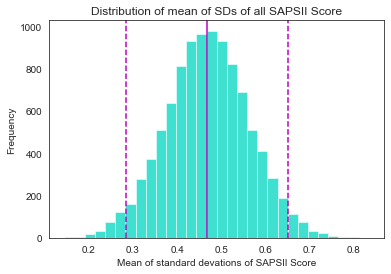

In [21]:
# Plot the histogram of values and mark the locations of the percentiles
_ = plt.hist(bs_std_diff, bins=30, linewidth=0.5, color='turquoise')
_ = plt.xlabel('Mean of standard devations of SAPSII Score')
_ = plt.ylabel('Frequency')
_ = plt.title('Distribution of mean of SDs of all SAPSII Score')
_ = plt.axvline(bs_std_diff_mean, color='m')
_ = plt.axvline(ci_std_diff[0], color='m', linestyle='--')
_ = plt.axvline(ci_std_diff[1], color='m', linestyle='--')

In [22]:
#Perform a bootstrapped hypothesis test at the 5% significance level to calculate the p-value of the observed difference between survived and deceased icu patients.

# Compute the difference in mean charges: diff_means
diff_means=np.mean(deceased) - np.mean(survived)
diff_means

14.74874822658952

In [23]:
#Define a function to generate a permutation sample from two data sets (insured and uninsured)
def permutation_sample(data1, data2):

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [24]:
#A bootstrap hypothesis test for difference of means
np.random.seed(47)
deceased_shifted=deceased - np.mean(deceased) + np.mean(survived)
perm_mean_replicates=np.empty(N_rep)
for i in range(N_rep):
    perm_survived, perm_deceased=permutation_sample(survived, deceased_shifted)
    perm_mean_replicates[i]=np.mean(perm_survived) - np.mean(perm_deceased)
    
bs_mean_diff=np.empty(N_rep)
for i in range(N_rep):
    bs_mean_diff[i]=np.mean(bs_survived) - np.mean(np.random.choice(deceased_shifted, len(deceased_shifted)))

# Compute p-value: perm_p, p
perm_p = np.sum(perm_mean_replicates>=diff_means)/len(perm_mean_replicates)
print('Permuation Pvalue: ', perm_p)
p=np.sum(bs_mean_diff>=diff_means)/len(bs_mean_diff)
print('Pvalue: ', p)


Permuation Pvalue:  0.0
Pvalue:  0.0


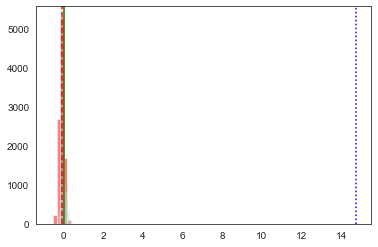

In [25]:
_=plt.hist(bs_mean_diff, alpha=0.5, bins=5, color='red')
_=plt.hist(perm_mean_replicates, linewidth=0.5, alpha=0.25, bins=30, color='turquoise')
_=plt.axvline(np.mean(perm_mean_replicates), color='g')
_=plt.axvline(np.mean(bs_mean_diff), color='r', linestyle='--')
_=plt.axvline(np.mean(diff_means), color='b', linestyle=':')


## Inferential Statistics - Bayesian

In [26]:
import pymc3 as pm
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt
from scipy.stats import gamma

In [27]:
#Initial parameter estimation for the gamma distribution's  𝛼  and  𝛽 
alpha_est = np.mean(deceased)**2 / np.var(deceased)
beta_est = np.var(deceased) / np.mean(deceased)
alpha_est, beta_est


(7.702206830403064, 6.742807762839468)

In [28]:
#Initial simulation - 
seed(47)
n_survived = len(survived)
n_deceased = len(deceased)
deceased_model_rvs = gamma(alpha_est, scale=beta_est).rvs(n_deceased)

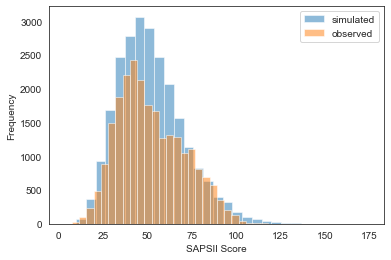

In [29]:
_ = plt.hist(deceased_model_rvs, bins=30, alpha=0.5, label='simulated')
_ = plt.hist(deceased, bins=30, alpha=0.5, label='observed')
_ = plt.xlabel('SAPSII Score')
_ = plt.ylabel('Frequency')
_ = plt.legend()

In [32]:
#creating a PyMC3 model
# PyMC3 Gamma seems to use rate = 1/beta
rate_est = 1/beta_est
# Initial parameter estimates we'll use below
alpha_est, rate_est
mean=np.mean(deceased)
sd=np.std(deceased)

In [44]:
with pm.Model() as a_model:
    alpha_ = pm.Exponential('alpha', 1/alpha_est)
    rate_ = pm.Exponential('beta', 1/rate_est)
    saps_deceased =pm.Gamma('Saps2_score_deceased', alpha=alpha_, beta=rate_, observed=deceased)
    trace = pm.sample(10000, tune=2000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha]
Sampling 4 chains: 100%|██████████| 48000/48000 [01:22<00:00, 580.59draws/s]
The number of effective samples is smaller than 25% for some parameters.


In [45]:
alpha_samples = trace['alpha']
beta_samples = trace['beta']
alpha_ci = np.percentile(alpha_samples, [2.5, 97.5])
beta_ci = np.percentile(beta_samples, [2.5, 97.5])
print('95% confidence interval for alpha: ', alpha_ci)
print('95% confidence interval for beta: ', beta_ci)

95% confidence interval for alpha:  [7.33467864 7.59837212]
95% confidence interval for beta:  [0.14113107 0.14638464]


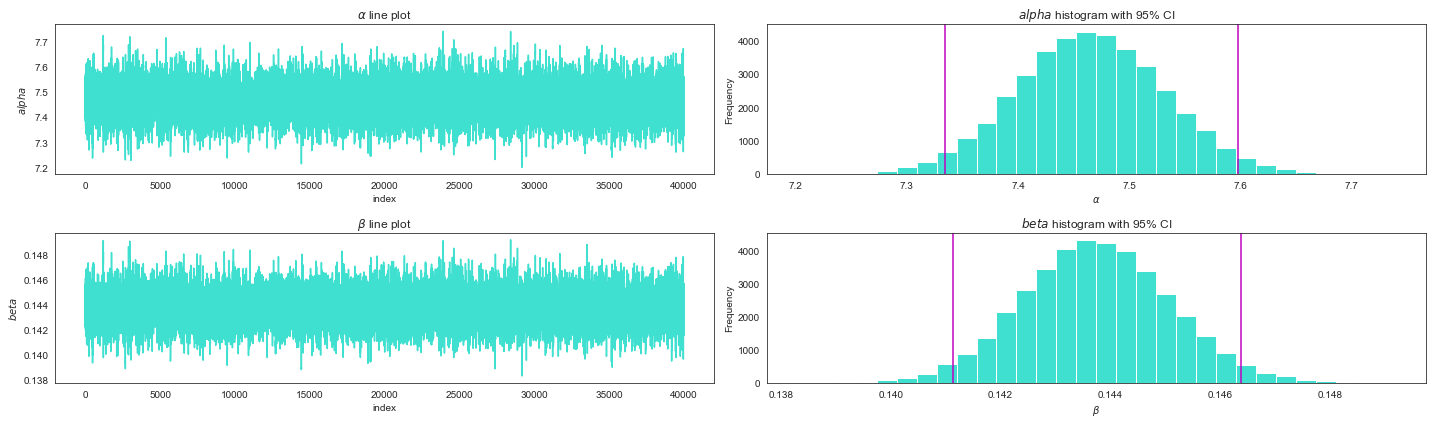

In [46]:
plt.figure(figsize=(20,6))
plt.subplot(2, 2, 1)
_ = plt.plot(alpha_samples, color='turquoise')
_ = plt.title(r'$\alpha$ line plot')
_ = plt.xlabel('index')
_ = plt.ylabel(r'$alpha$')
plt.subplot(2, 2, 2)
_ = plt.hist(alpha_samples, bins=30, color='turquoise')
_ = plt.xlabel(r'$\alpha$')
_ = plt.ylabel('Frequency')
_ = plt.title(r'$alpha$ histogram with 95% CI')
_ = plt.axvline(x=alpha_ci[0], c='m')
_ = plt.axvline(x=alpha_ci[1], c='m')
plt.subplot(2, 2, 3)
_ = plt.plot(beta_samples, color='turquoise')
_ = plt.title(r'$\beta$ line plot')
_ = plt.xlabel('index')
_ = plt.ylabel(r'$beta$')
plt.subplot(2, 2, 4)
_ = plt.hist(beta_samples, bins=30, color='turquoise')
_ = plt.xlabel(r'$\beta$')
_ = plt.ylabel('Frequency')
_ = plt.title(r'$beta$ histogram with 95% CI')
_ = plt.axvline(x=beta_ci[0], c='m')
_ = plt.axvline(x=beta_ci[1], c='m')
plt.tight_layout()

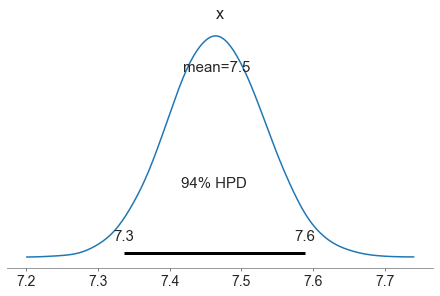

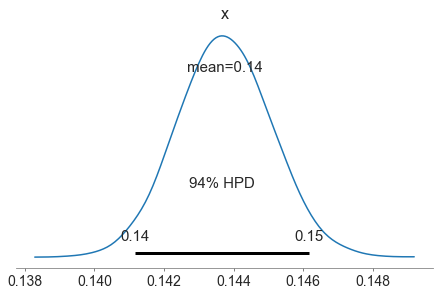

In [47]:
_ = pm.plots.plot_posterior(data=trace['alpha'])
_ = pm.plots.plot_posterior(data=trace["beta"])

In [48]:
alpha_best = np.mean(alpha_samples)
beta_best = np.mean(beta_samples)
alpha_best, 1/beta_best


(7.465256701387036, 6.956907617912886)

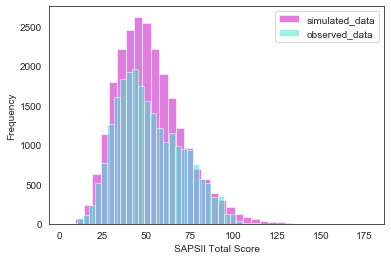

In [50]:
seed(47)
best_shot_simulated = gamma(alpha_best, scale=1/beta_best).rvs(n_deceased)
_ = plt.hist(best_shot_simulated, bins=35, alpha=0.5, color='m', label='simulated_data')
_ = plt.hist(deceased, bins=35, alpha=0.5, color='turquoise', label='observed_data')
_ = plt.xlabel('SAPSII Total Score')
_ = plt.ylabel('Frequency')
_ = plt.legend()